# importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

In [3]:
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '013 Analyzed Data outputs' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

In [4]:
folderNameHeader = "FeatListComp"
folderNameCommon = "_allLabsModels"
folderNameSuffix = "_2024-08-05_v1"

fileNameHeader = "FeatListComp"
fileNameCommon = "_allLabsModels"
fileNameSuffix = "_2024-08-05_v1"

folder_data_out = makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

# directory for getting the original feature list

In [5]:
project_lv2_directory = '012 Processed Data/AL_Known_DataComplet-Freq_allLabs_2024-08-02_v1' #deeper part of project folder

# "C:\Users\mcremer\UFL Dropbox\Maegan Cremer\research-share\Maegan\Projects\Cardiac-Amyloidosis-Multiple-Myeloma\012 Processed Data\AL_Known_DataComplet-Freq_allLabs_2024-08-02_v1"

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path
os.chdir(new_dirrectory)

### importing the data

In [6]:
#import the original feature list
lab_list_import = pd.read_excel("AL_Known_DataComplet-Freq_allLabs_2024-08-02_v1.xlsx", sheet_name = "labs completeness", header = [0])
# "C:\Users\mcremer\UFL Dropbox\Maegan Cremer\research-share\Maegan\Projects\Cardiac-Amyloidosis-Multiple-Myeloma\012 Processed Data\AL_Known_DataComplet-Freq_allLabs_2024-08-02_v1\AL_Known_DataComplet-Freq_allLabs_2024-08-02_v1.xlsx"

### collecting the lab names and the number of patients as seperate series

In [7]:
lab_list = lab_list_import.iloc[:,0] #list of the raw lab result names without transformations
lab_list_import.index = lab_list_import.iloc[:,0]
lab_list_dict = lab_list_import.T.to_dict() #nested dictionary where there is a row "Number of Patients with this lab"
lab_list_numbpts = lab_list_import.iloc[:,2] #for use later in assessing the completeness of the data

In [8]:
df_lab_list_numb_pts = lab_list_import.iloc[:,[2]]
df_lab_list_numb_pts.index = lab_list_import.iloc[:,[0]]

### additional features describing patients which arean't labs in their untransformed states
no descriptive statistics or fits

In [9]:
# #additional starting features
# additional_features = pd.Series(["Amyloid Status", "Dx", "Sex", 'Age', 'Survival (in months)',
#                        "ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
#                        "RadTx", "RadTx Number", "OtherTx", "OtherTx Number", 'time from diagnosis to note (months)', 
#                        'ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease', 
#                        "1st_EF(avg%)", "1st_Diastolic grade", "1st_BSA", "1st_PWT(cm)", "1st_IVS(cm)", "1st_lvid(cm)", 
#                        "1st_LA_dimension (cm)","1st_Lvmass", "1st_LVMI","1st_RWT", "1st_LA_grade", "1st_mv_grade", 
#                        "1st_AV_grade", "1st_rvsp(mmHg)", "1st_LVH", "1stGLS", "1stGLSreported", "use1stGLS", 
#                        "1st_outerLS", "1st_midLS", "1st_innerLS", "1st_echoOSH"])

In [10]:
#additional starting features
additional_features = pd.Series(["Amyloid Status", "Dx", "Sex", 'Age', 'Survival (in months)',
                       "ChemoTx", "ImmunoTx", "HemeTx", 
                       "RadTx", "OtherTx", 'time from diagnosis to note (months)', 
                       'ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease', 
                       "1st_EF(avg%)", "1st_Diastolic grade", "1st_BSA", "1st_PWT(cm)", "1st_IVS(cm)", "1st_lvid(cm)", 
                       "1st_LA_dimension (cm)","1st_Lvmass", "1st_LVMI","1st_RWT", "1st_LA_grade", "1st_mv_grade", 
                       "1st_AV_grade", "1st_rvsp(mmHg)", "1st_LVH", "1stGLS", "1stGLSreported", "use1stGLS", 
                       "1st_outerLS", "1st_midLS", "1st_innerLS", "1st_echoOSH", "time from diagnosis to first echo (months)"])
#here the "ChemoTx Number" and similar original data were removed as they will be picked up as transformations

In [11]:
full_og_featureList = pd.concat([lab_list, additional_features], axis = 0) #adding the two lists of features together
full_og_featureList.reset_index()

,index,0
0,0,total CO2 Result
1,1,BUN Result(mg/dL)
2,2,Potassium Result(mmol/L)
3,3,Glucose Result
4,4,Creatinine Result(mg/dL)
...,...,...
172,32,1st_outerLS
173,33,1st_midLS
174,34,1st_innerLS
175,35,1st_echoOSH


In [12]:
#get the list of best features from the SVM

# get the list of best features from the SVM models 

In [13]:
project_lv2_directory = '013 Analyzed Data outputs' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path
os.chdir(new_dirrectory)

### importing the list of best features by model and finding the unique list of features + transformations

In [14]:
#importing the dataframe describing features selected for each model
# features_across_allmodels = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list", header = [0,1,2])
# features_across_allmodels.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)
# features_across_models= features_across_allmodels

#for top 38 labs
# features_across_top38 = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list top 38", header = [0,1,2])
# features_across_top38.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)
# features_across_models= features_across_top38

#for all labs models
features_across_allLabs = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list all labs", header = [0,1,2])
features_across_allLabs.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)
features_across_models= features_across_allLabs


### assigning variables to fit data imported

In [15]:
#setting equivalency so that the code updates as you move down
features_across_models= features_across_allLabs

#create 1D list of features across all models
features_1D = features_across_models.to_numpy().flatten()

features_1D_clean = features_1D[~pd.isna(features_1D)]
#create list of unique features across all models
features_1D_unique = pd.unique(features_1D_clean)

### Describing the frequency of features across all models

In [16]:
#characterize the frequency of the transformed feature in the list of features selected by SVM
from collections import Counter
feature_counts = Counter(features_1D_clean)
feature_counts_dict = dict(feature_counts)


# Comparing the original data types to the list of features
makes a dictionary where the keys are the original data types represented among the features\
values are the best features represented across all models

In [17]:
#find the original list of labs within the transformed list
#filters the unique list of labs

dict_og_to_transformed = {}
dict_og_to_trimmed_transformed = {} #for use in multi-indexing
# list_transformedFeatures = []
for og_feature in full_og_featureList:
    list_transformedFeatures = []
    list_transformations = []
    for feature_transformed in features_1D_unique:
        if og_feature in feature_transformed:
            # list_transformedFeatures.append(feature_transformed)
            #trimming slicing the original feature off and adding the transformed section to a list
            start_position_for_slice = len(og_feature) + 1 #removes the space when slicing
            name_transformation = feature_transformed[start_position_for_slice:] #slices the length of the orginal feature off the string
            #check to see if the section trimmed from the feature exactly matches the og_feature
            trimmed_head_string = feature_transformed[:len(og_feature)]
            if trimmed_head_string == og_feature: #ensures that the feature identified isn't a variation such as PCT myelocyte vs myelocyte
                if name_transformation != "eported": #a little weirdness from one of the echo measures
                    list_transformations.append(name_transformation) #adds the transformation to the list for that feature
                    list_transformedFeatures.append(feature_transformed) #adds the og+transform to the og_to_transform
    if len(list_transformedFeatures) != 0:
        dict_og_to_transformed[og_feature] = list_transformedFeatures
        dict_og_to_trimmed_transformed[og_feature] = list_transformations

In [18]:
#creating multi-indexed pattern for the table of features used in the SVM models 

#collecting the two arrays for indexing from the dictionary
level_1 = [] #keys
level_2 = [] #values, or the transformations

#to make the key list the same length as the value list such that the pairings can be made... 
for key in list(dict_og_to_trimmed_transformed.keys()):
    for transformation in list(dict_og_to_trimmed_transformed[key]):
        level_1.append(key)
        level_2.append(transformation)

level_1_2 = [level_1, level_2]
multiIndex_tuple_features = list(zip(*level_1_2))

### create binary dataframe of features per model with multiIndex

In [19]:
#set the unique features to the row index 
row_dictionary = dict_og_to_transformed

#set the columns to the headers from earlier, the models
column_index = features_across_models.columns

dict_binary = {}
#pull the features from a column and compare them to 
for column in column_index: 
    column_data_binary = []
    column_data = features_across_models[column]
    for key in list(row_dictionary.keys()):
        for feature in list(row_dictionary[key]):
            if feature in column_data.values:
                column_data_binary.extend([1])
            else:
                column_data_binary.extend([0])
    dict_binary[column] = column_data_binary       



multiIndex_features = pd.MultiIndex.from_tuples(multiIndex_tuple_features, names=["original data", "transformation"])
df_binary = pd.DataFrame.from_dict(dict_binary, orient = "columns")

df_binary.index = multiIndex_features


In [20]:
outputToExcel(df_binary,parent_dir=parent_dir, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "all models binary")

### frequency of original feature in a model 

In [21]:
#correlation matrix for the original data selected by the models 

#take the binary of the data, flatten such that the original data has a value equal to the number of transforms performed on it

#set data frame
df = df_binary
dict_levels = dict_og_to_trimmed_transformed #setting indexing dictionary

dict_orig_data_frequency_in_model = {} #keys are the models, values are the frequencies of original data in the selected features

for column in list(df.columns):
    column_data = []
    # row_names = []
    for original_data in list(dict_levels.keys()):
        feature_count = df[column].loc[original_data].sum()
        column_data.append(feature_count)
        # row_names.append(original_data)
    dict_orig_data_frequency_in_model[column] = column_data

#convert to dataframe
df_orig_data_frequency_in_model = pd.DataFrame.from_dict(dict_orig_data_frequency_in_model, orient = "columns")
df_orig_data_frequency_in_model.index = list(dict_levels.keys())

outputToExcel(df_orig_data_frequency_in_model, parent_dir=parent_dir, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
            fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "all models orig features frq")


# organizing the frequency information to a multiIndexed dataframe


In [22]:
#set the unique features to the row index 
row_dictionary = dict_og_to_transformed

dict_frequencyList = {}
for key in list(row_dictionary.keys()):
    for feature in list(row_dictionary[key]):
        dict_frequencyList[feature] = feature_counts_dict[feature] #reorders the dictionary?


multiIndex_features = pd.MultiIndex.from_tuples(multiIndex_tuple_features, names=["original data", "transformation"])
df_featureFrequency = pd.DataFrame.from_dict(dict_frequencyList, orient = "index")

df_featureFrequency.index = multiIndex_features 

In [23]:
outputToExcel(df_featureFrequency, parent_dir=parent_dir, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
        fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "all models feature frequency")


In [24]:
# #figure out where the duplicates are

# #  = [' '.join(map(str, col)).strip() for col in dict_og_to_trimmed_transformed]
# test_compress_1 =[group + ' ' + transform for group in list(dict_og_to_trimmed_transformed.keys()) 
#                   for transform in list(dict_og_to_trimmed_transformed[group])]



# visualizations

In [25]:
# current_dir = os.getcwd()
# new_dirrectory = os.chdir('../')
# print(os.getcwd())

In [26]:
# #first, get the completeness of the different labs
# lab_list_import = pd.read_excel("012 Processed Data\PtLabsFiltered_2024-06-26_v1\ListPts-W-WO-Lab-20240626_v2.xlsx", sheet_name = "lab list pts without", header = [0])
# lab_list = lab_list_import.iloc[:,0]
# lab_list_import.index = lab_list_import.iloc[:,0]
# lab_list_dict = lab_list_import.T.to_dict() #nested dictionary where there is a row "Number of Patients with this lab"
# new_dirrectory= current_dir
# os.chdir(new_dirrectory)

In [27]:
# df_lab_list_numb_pts = lab_list_import.iloc[:,[2]]
# df_lab_list_numb_pts.index = lab_list_import.iloc[:,[0]]

## Correlation matrix for features across different models

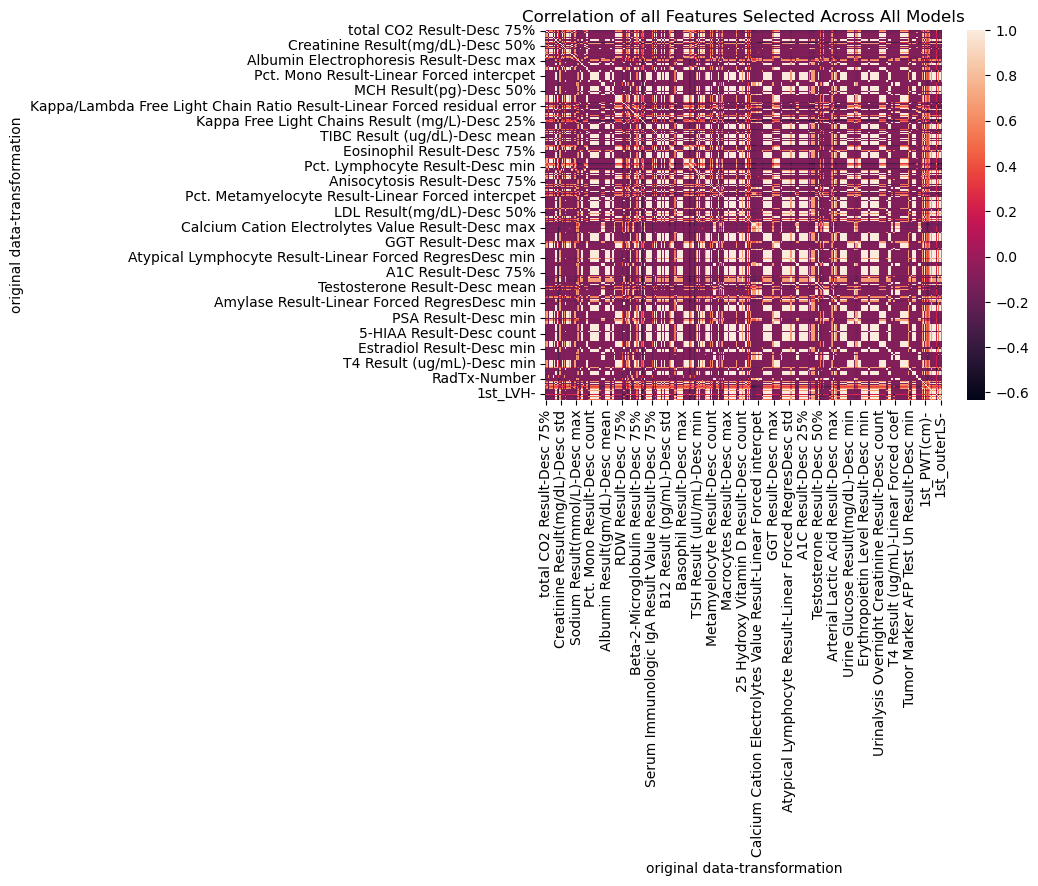

In [28]:
#correlation matrix for raw features
# import seaborn as sns
corr = df_binary.T.corr()

allFeatures_heatmap = sns.heatmap(corr)
allFeatures_heatmap.set(title="Correlation of all Features Selected Across All Models")

allFeatures_heatmap_fig = allFeatures_heatmap.get_figure()


fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="_allFeatures_allmodels_heatmap", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

allFeatures_heatmap_fig.savefig(fig_file_out)

In [29]:
# #correlation matrix for the original data selected by the models 

# #take the binary of the data, flatten such that the original data has a value equal to the number of transforms performed on it

# #set data frame
# df = df_binary
# dict_levels = dict_og_to_trimmed_transformed #setting indexing dictionary

# dict_orig_data_frequency_in_model = {} #keys are the models, values are the frequencies of original data in the selected features

# for column in list(df.columns):
#     column_data = []
#     # row_names = []
#     for original_data in list(dict_levels.keys()):
#         feature_count = df[column].loc[original_data].sum()
#         column_data.append(feature_count)
#         # row_names.append(original_data)
#     dict_orig_data_frequency_in_model[column] = column_data

# #convert to dataframe
# df_orig_data_frequency_in_model = pd.DataFrame.from_dict(dict_orig_data_frequency_in_model, orient = "columns")
# df_orig_data_frequency_in_model.index = list(dict_levels.keys())
# # df_orig_data_frequency_in_model.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)

# with pd.ExcelWriter("featureComparison_2024-08_01_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
#     df_featureFrequency.to_excel(writer, sheet_name = "all models orig features frq", index = True)


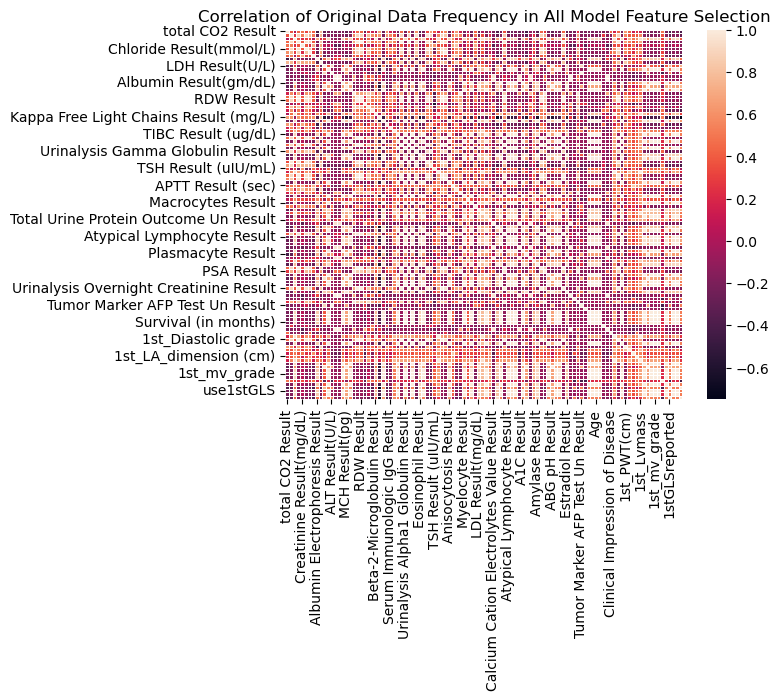

In [30]:
corr = df_orig_data_frequency_in_model.T.corr()

orig_features_heatmap= sns.heatmap(corr, linewidths=0.5)
orig_features_heatmap.set(title="Correlation of Original Data Frequency in All Model Feature Selection")
orig_features_heatmap_fig= orig_features_heatmap.get_figure()


fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="origFeatures_allmodels_heatmap", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
orig_features_heatmap_fig.savefig(fig_file_out)

In [31]:
#frequency of original data across all models
frequency_origData_allModels = df_orig_data_frequency_in_model.sum(axis=1)
frequency_origData_allModels =frequency_origData_allModels.to_frame()
frequency_origData_allModels.insert(0, "original data", frequency_origData_allModels.index)
frequency_origData_allModels.columns = ["original data", "frequency across models"]

In [32]:
#find the maximum value of frequency of original data 
max_value_colormap = int(frequency_origData_allModels.max(axis= 0, numeric_only = True)) 

cmap_resampled = mpl.colormaps['viridis_r'].resampled(max_value_colormap)

newcolors_formap_woInsert = cmap_resampled(np.linspace(0,1,max_value_colormap, endpoint=False))
cmap_woInsert = mpl.colors.ListedColormap(newcolors_formap_woInsert)

#adding a color for 0 to make it easy to identify
insertColor = np.array([67/256,185/256, 240/256, 1])
# insertColor = np.array([248/256, 24/256, 148/256, 1])
newcolors_formap_extended = cmap_resampled(np.linspace(0,1,max_value_colormap, endpoint = False))
# newcolors_formap_extended[0, :] = insertColor 
newcolors_formap_extended= np.insert(newcolors_formap_extended, 0, insertColor, axis = 0)
cmap_wInsert = mpl.colors.ListedColormap(newcolors_formap_extended)

C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\4118827037.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  max_value_colormap = int(frequency_origData_allModels.max(axis= 0, numeric_only = True))


C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\4251863161.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0",
C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\4251863161.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "mean",


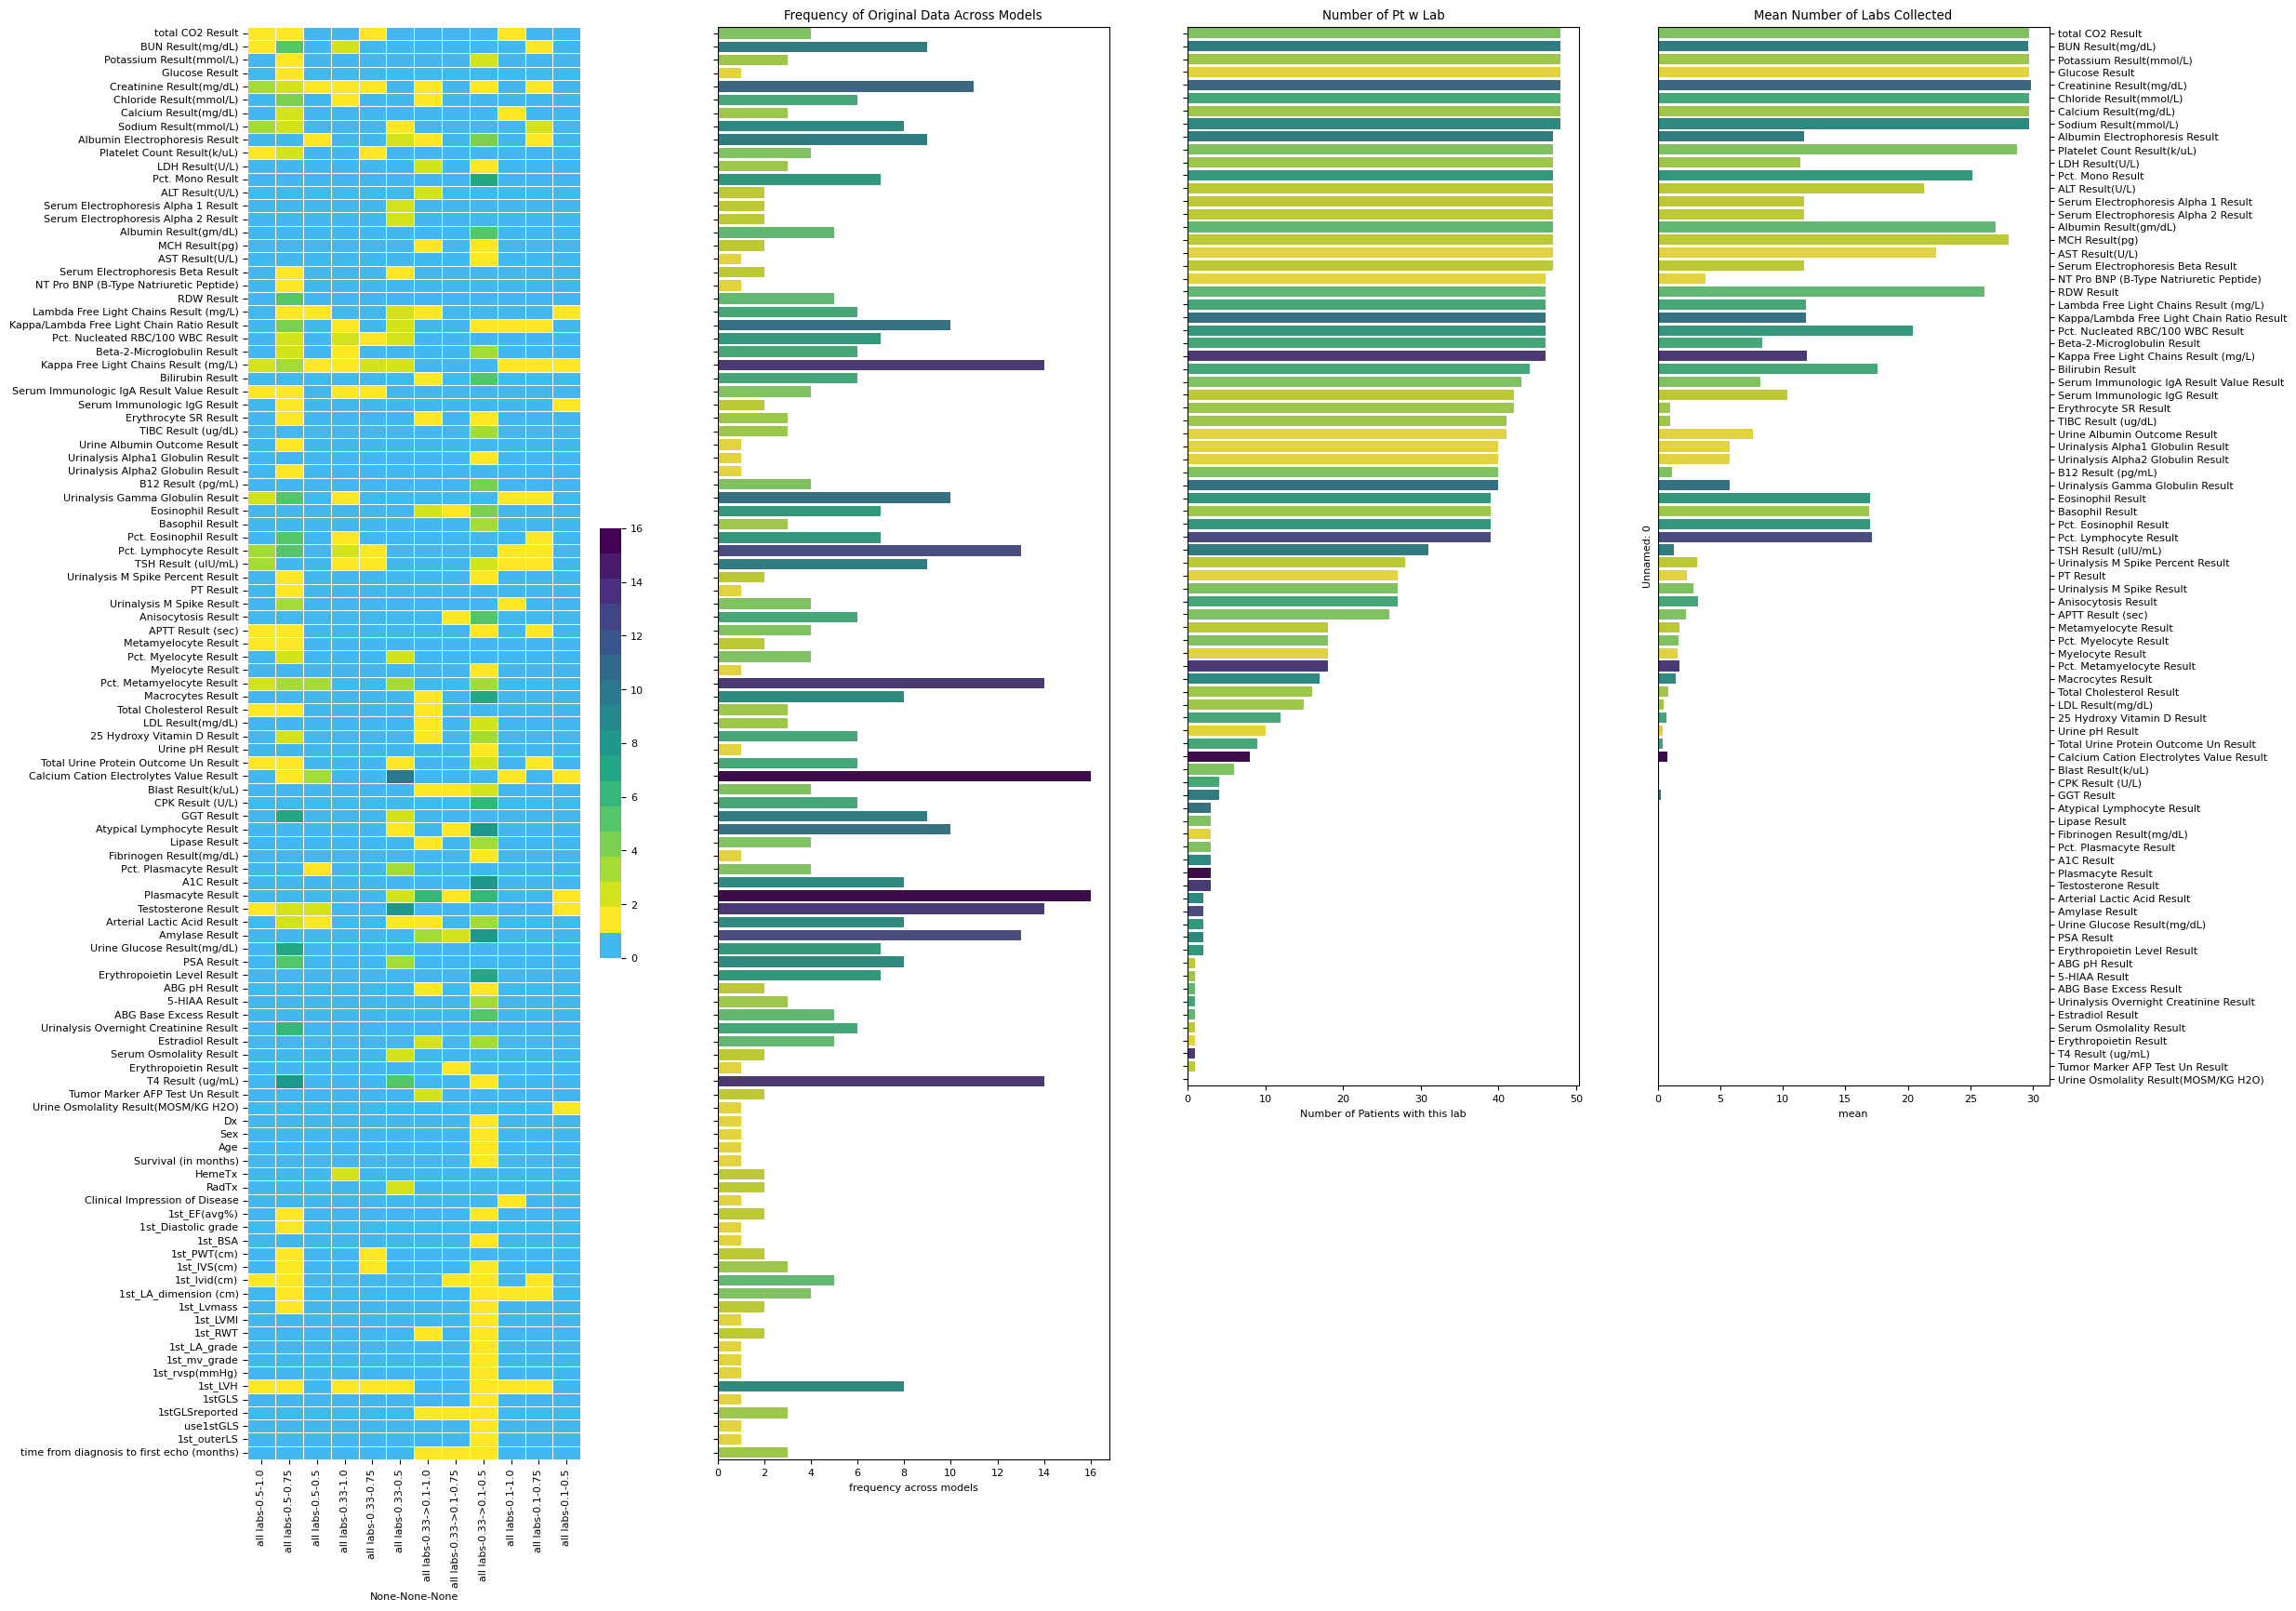

In [40]:
plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize = (25,20))

ax1 = plt.subplot2grid((4,4), (0,0), rowspan = 4)
ax1 = sns.heatmap(df_orig_data_frequency_in_model, yticklabels=list(df_orig_data_frequency_in_model.index), 
                  vmax = max_value_colormap, vmin = 0, cmap= cmap_wInsert, linewidths= 0.5, 
                # cbar=False
                cbar_kws={'location': 'right', 'fraction': 0.1, 'shrink': 0.3}
                )

#plot frequency of the original data type across models
ax4 = plt.subplot2grid((4,4), (0,1), rowspan = 4)
#creating a colorbar for this plot to help with understanding frequency 
norm_frequency = plt.Normalize(frequency_origData_allModels["frequency across models"].min(),
                               frequency_origData_allModels["frequency across models"].max())
sm_frequency = plt.cm.ScalarMappable(cmap = cmap_woInsert, norm = norm_frequency)

#plotting frequency across models
ax4 = sns.barplot(frequency_origData_allModels, y = "original data"  , x = "frequency across models",
                  hue = "frequency across models", legend = False, palette = cmap_woInsert)
ax4.set(title = "Frequency of Original Data Across Models")
ax4.set(ylabel=None)
ax4.set(yticklabels=[])
# cbar = ax4.figure.colorbar(sm_frequency, ax = ax4, shrink = 0.3)
# cbar.set_ticks(ticks = [1, 2, 4, 6, 8, 10, 12, 14, 16])


#taking the colormaping from ax4 and maping it to the variable names so that it can be used in other plots
color_mapping = {}
for data_name in list(frequency_origData_allModels["original data"]):
    # print(data_name)
    i = int(frequency_origData_allModels.at[data_name,'frequency across models']) -1
    color_mapping[data_name] = newcolors_formap_woInsert[i]

#add another subplot that shows the completeness of data for only the labs shown
ax2 = plt.subplot2grid((4,4), (0,2), rowspan = 3)

#filter df_lab_list_numb_pts to be only the labs graphed 
new_list = []
lab_list = lab_list_import.iloc[:,0]
lab_list_import.index = lab_list_import.iloc[:,0]
# print(lab_list.values.tolist())
for item in list(dict_og_to_trimmed_transformed.keys()):
    # print(item)
    for lab in lab_list:
        if item == lab:
            # print(item + " True")
            new_list.append(item)

masked_df_lab_numb_ptNumber = lab_list_import.loc[new_list]
df_labNumb_ptNumb_filtered_subplots= masked_df_lab_numb_ptNumber.iloc[:,[0,1,2, 4,5]]

# Create a palette for the new plot based on the frequency plot
#preserves the colors assigned to a lab based on frequency
#do note that the colors were assigned by lowest value = position 0 in the colors array
#the lowest value in the frequency array is 1 not 0, keep this in mind when making a colorbar
new_palette = [color_mapping.get(data_name) for data_name in df_labNumb_ptNumb_filtered_subplots["Unnamed: 0"]]


ax2 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", 
                  x = "Number of Patients with this lab",
                  palette=new_palette)

ax2.set(ylabel=None)
ax2.set(yticklabels=[])
ax2.set(title= "Number of Pt w Lab")


# ax3 = plt.subplot2grid((4,4), (0,3), rowspan = 3)
# ax3 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "total number of labs collected",
#                   palette=new_palette)
# ax3.yaxis.tick_right()
# ax3.set(title="Total Numb Labs Collected")

ax3 = plt.subplot2grid((4,4), (0,3), rowspan = 3)
ax3 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "mean",
                  palette=new_palette)
# ax3.bar_label(df_labNumb_ptNumb_filtered_subplots['std'], fontsize=8) #needs patches to list the numbers
ax3.yaxis.tick_right()
ax3.set(title="Mean Number of Labs Collected")

# ax3 = ax3.barh( y = df_labNumb_ptNumb_filtered_subplots["Unnamed: 0"], width = df_labNumb_ptNumb_filtered_subplots["mean"],
#                   color=new_palette, xerr=df_labNumb_ptNumb_filtered_subplots["std"])
# ax3.yaxis.tick_right()
# ax3.set(title="Mean Number of Labs Collected")

# ax3 = ax3.barh( data =df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "mean",
#                   color=new_palette, xerr=df_labNumb_ptNumb_filtered_subplots["std"])
# ax3.yaxis.tick_right()
# ax3.set(title="Mean Number of Labs Collected")

# fig.suptitle("Character of Original Lab Data Selected As Features Across All Models", fontsize = 12)


fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="_allModels_origFeats_composit", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

fig.savefig(fig_file_out)

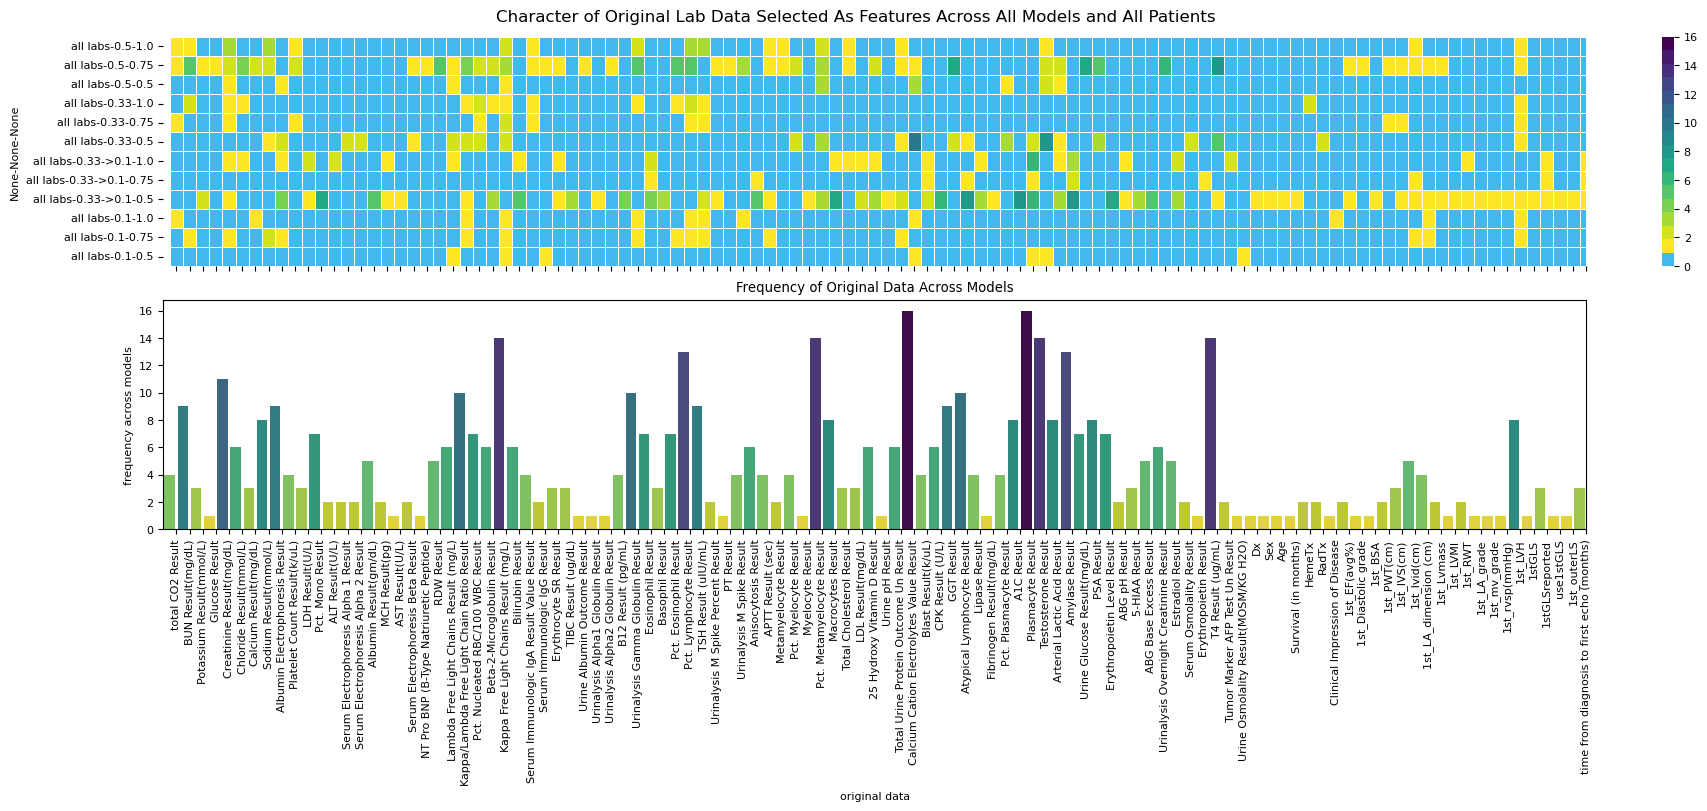

In [34]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(2,1, figsize=(17, 8), sharex = True, layout = 'constrained')
heatmap = sns.heatmap(df_orig_data_frequency_in_model.T, 
                      xticklabels=list(df_orig_data_frequency_in_model.index),
                      cmap= cmap_wInsert, linewidths= 0.5, 
                      cbar_kws={'location': 'right', 'fraction': 0.1, 'shrink': 1}, 
                      vmax = max_value_colormap, vmin = 0, cbar= True, ax =ax[0])

ax[0].set(xlabel = None)
ax[0].set(xticklabels=[])

#plot frequency of the original data type across models

frqplot = sns.barplot(frequency_origData_allModels, x = "original data"  , y = "frequency across models", 
                      ax = ax[1], hue = "frequency across models", legend = False, palette = cmap_woInsert)
ax[1].set(title = "Frequency of Original Data Across Models")

ax[1].set_xticklabels(frequency_origData_allModels["original data"], rotation = 90, ha = "center")

fig.suptitle("Character of Original Lab Data Selected As Features Across All Models and All Patients", fontsize = 12)

fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="_allModels_origFeat_heatmap_frq", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

fig.savefig(fig_file_out)

C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\2113517955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_numb_pt_wLab= sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0",
C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\2113517955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_numb_instances = sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0",
C:\Users\mcremer\AppData\Local\Temp\ipykernel_13456\2113517955.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(frequency_origData_allModels["original data"], rotation = 90, ha = "center")


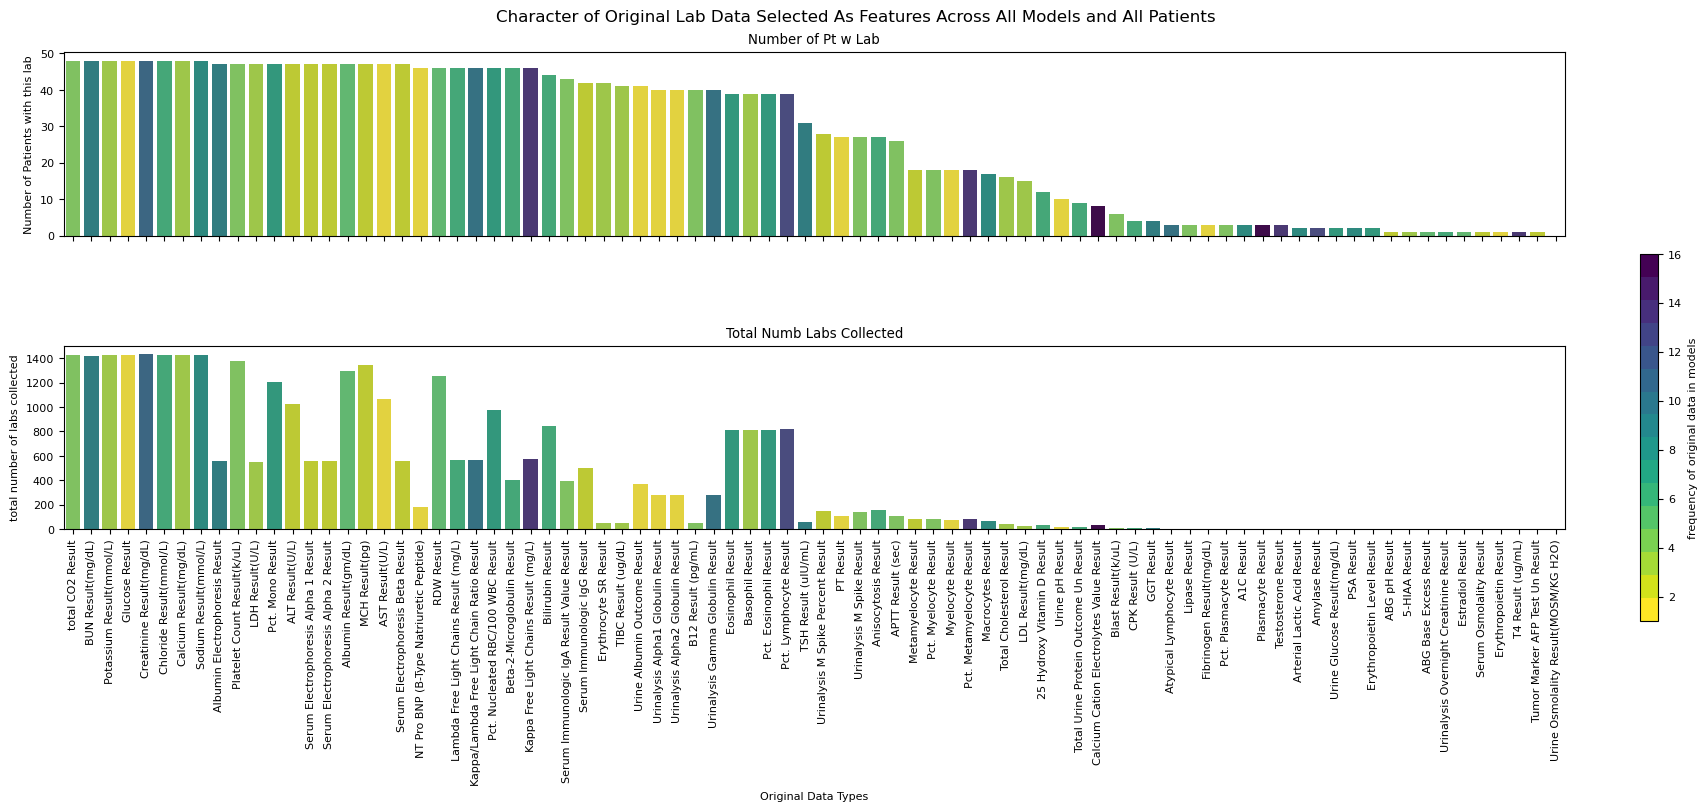

In [35]:
fig, ax = plt.subplots(2,1, figsize=(17, 8), sharex = True, layout = 'constrained')

plot_numb_pt_wLab= sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0", 
                               y = "Number of Patients with this lab", ax= ax[0],
                               palette=new_palette)

ax[0].set(xlabel=None)
ax[0].set(xticklabels=[])
ax[0].set(title= "Number of Pt w Lab")

plot_numb_instances = sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0", 
                                  y = "total number of labs collected", ax= ax[1],
                                  palette=new_palette)
# ax[1].xaxis.tick_right()
ax[1].set_xticklabels(frequency_origData_allModels["original data"], rotation = 90, ha = "center")
ax[1].set(xlabel="Original Data Types")
ax[1].set(title="Total Numb Labs Collected")
fig.suptitle("Character of Original Lab Data Selected As Features Across All Models and All Patients", fontsize = 12)

cbar = ax4.figure.colorbar(sm_frequency, ax = ax[1], shrink = 2,
                           label= 'frequency of original data in models')

fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="_allModels_origFeat_ptNumb_inst", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out)

## Illustrating data completeness for features selected by a model

copy the binary dataframe.  Then replace row column pairs which are 1 to the number of patients with that original piece of data

# Repeat for the other versions of the data